In [1]:
# Import Necessary libary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve
)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
TRAIN_PATH = "/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv"
TEST_PATH = "/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv"

In [15]:
##Data Mining and Exploration

# Step 3: Define the function
def load_and_explore(train_path=TRAIN_PATH, test_path=TEST_PATH):
    train = pd.read_csv(train_path)
    test = pd.read_csv(test_path)
    
    info = {
        'train_shape': train.shape,
        'test_shape': test.shape,
        'train_head': train.head(),
        'missing_train': train.isna().sum(),
        'target_dist': train['Loan_Status'].value_counts(normalize=True)
    }
    return train, test, info

# Step 4: Call the function FIRST to create the variables
train, test, info = load_and_explore()

# Step 5: Now you can safely print from info
print("Train Shape:", info['train_shape'])
print("\nTrain Head:\n", info['train_head'])
print("\nMissing Values:\n", info['missing_train'])
print("\nTarget Distribution:\n", info['target_dist'])


Train Shape: (614, 13)

Train Head:
     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rur

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [16]:
 Descriptive Statistics
print("===== Basic Info =====")
print(train.info())
print("\n===== Statistical Summary =====")
print(train.describe(include='all'))

===== Basic Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

===== Statistical Summary =====
         Loan_ID Gender Married Dependents Educatio

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [ ]:
Data Visulization

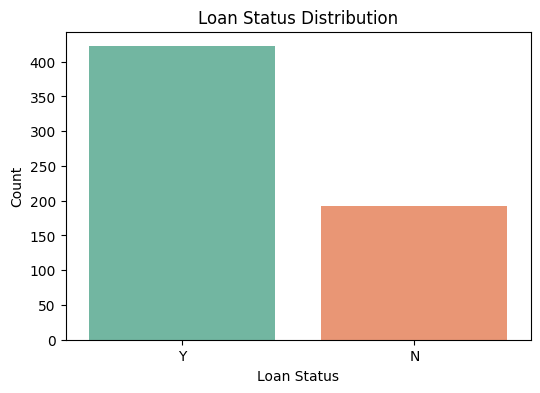

In [19]:
# 3️⃣ Target Variable Distribution
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Status', data=train, palette='Set2')
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

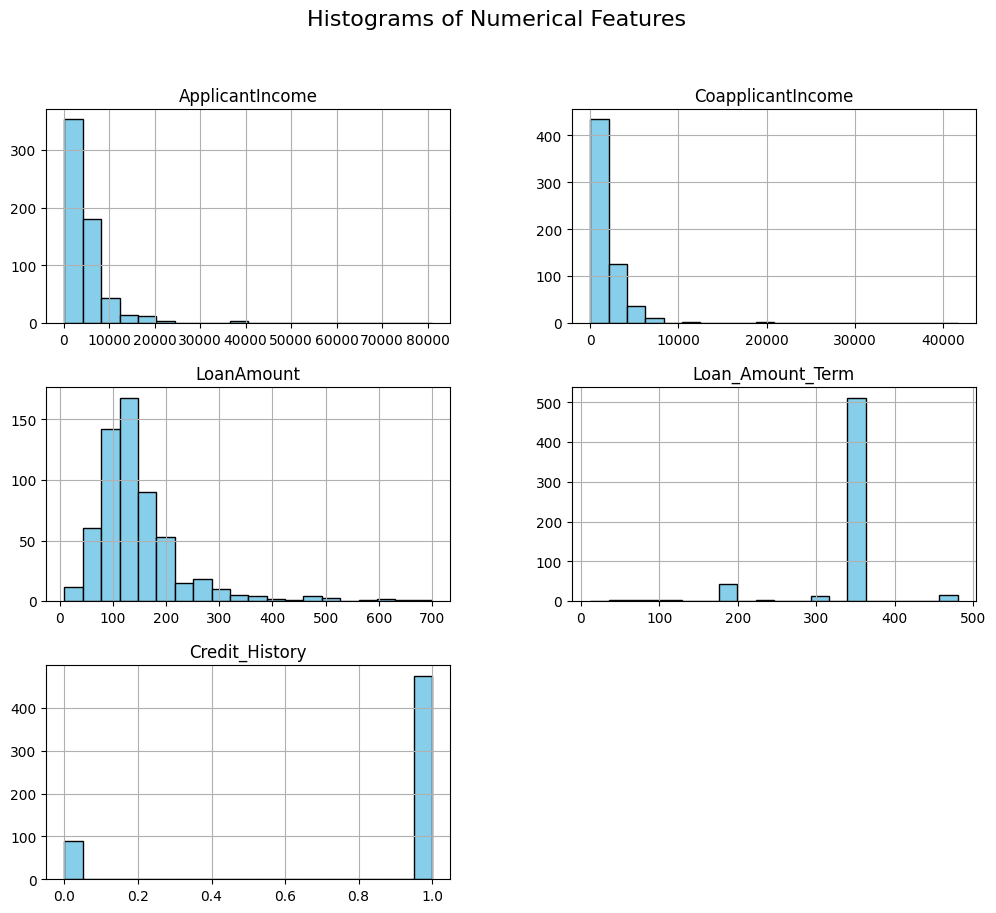

In [21]:
#Histogram for Numerical Features
num_cols = train.select_dtypes(include=['int64', 'float64']).columns

train[num_cols].hist(figsize=(12,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

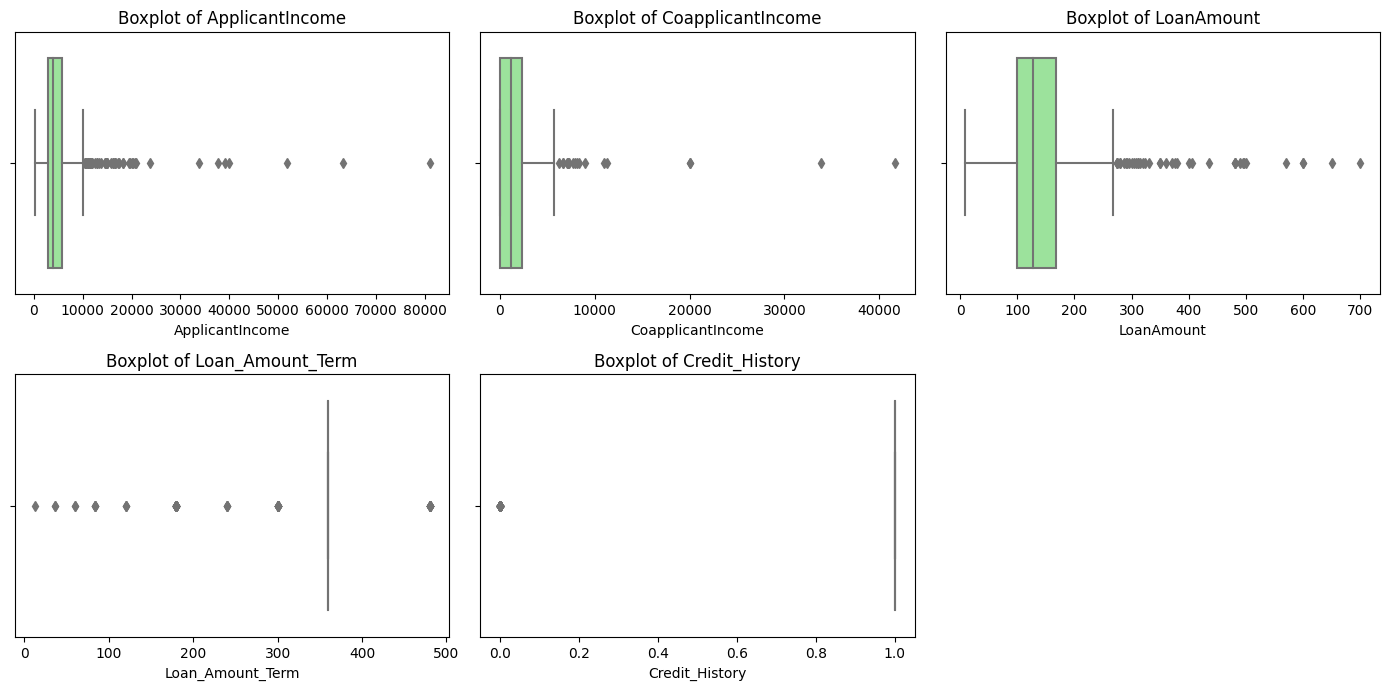

In [22]:
#Boxplots to Detect Outliers
plt.figure(figsize=(14,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=train[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

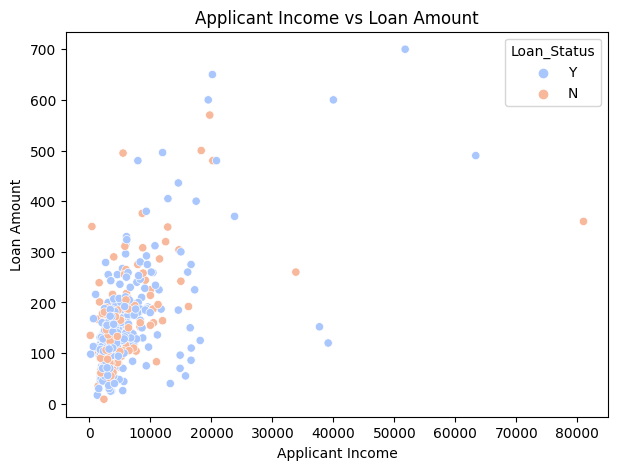

In [23]:
#Relationship between Applicant Income and Loan Amount
plt.figure(figsize=(7,5))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=train, hue='Loan_Status', palette='coolwarm')
plt.title("Applicant Income vs Loan Amount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

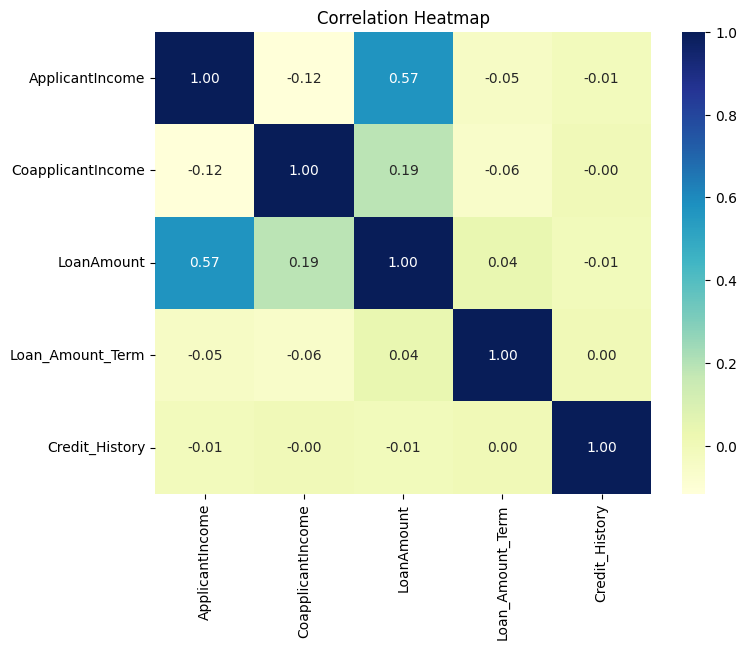

In [25]:
#Correlation Heatmap for Numerical Columns
plt.figure(figsize=(8,6))
corr = train[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [33]:
# categorical bar charts
    plt.figure(figsize=(6,4))
    train_df.groupby(['Education','Loan_Status']).size().unstack(fill_value=0).plot(kind='bar')
    plt.title("Loan_Status by Education")
    show_plot()

    plt.figure(figsize=(6,4))
    pa = train_df.groupby(['Property_Area','Loan_Status']).size().unstack(fill_value=0)
    pa.div(pa.sum(axis=1), axis=0).plot(kind='bar')
    plt.title("Proportion of Loan_Status by Property_Area")
    show_plot()

IndentationError: unexpected indent (2760211273.py, line 2)

<Figure size 600x400 with 0 Axes>

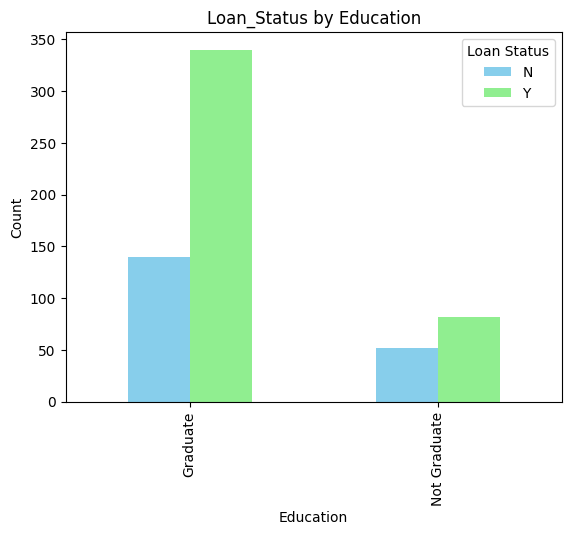

<Figure size 600x400 with 0 Axes>

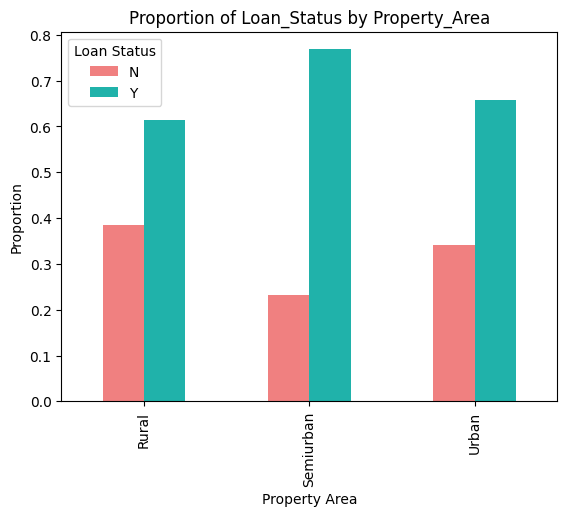

In [34]:
# categoral bar chart

# Loan Status by Education
plt.figure(figsize=(6,4))
train_df.groupby(['Education', 'Loan_Status']).size().unstack(fill_value=0).plot(kind='bar', color=['skyblue','lightgreen'])
plt.title("Loan_Status by Education")
plt.xlabel("Education")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()  # ✅ Correct

#  Proportion of Loan Status by Property Area
plt.figure(figsize=(6,4))
pa = train_df.groupby(['Property_Area', 'Loan_Status']).size().unstack(fill_value=0)
pa.div(pa.sum(axis=1), axis=0).plot(kind='bar', color=['lightcoral', 'lightseagreen'])
plt.title("Proportion of Loan_Status by Property_Area")
plt.xlabel("Property Area")
plt.ylabel("Proportion")
plt.legend(title="Loan Status")
plt.show()  # ✅ Correct


In [37]:
#Model Development (supervised  Logistic Regression)
# ---------------------------
def train_supervised_models(X_train, y_train, preprocessor):
    # Logistic Regression pipeline
    log_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                               ('clf', LogisticRegression(max_iter=1000))])
    # Random Forest pipeline
    rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('clf', RandomForestClassifier(n_estimators=200, random_state=42))])
    # Fit
    log_pipe.fit(X_train, y_train)
    rf_pipe.fit(X_train, y_train)
    return {'Logistic': log_pipe, 'RandomForest': rf_pipe}

In [45]:
# Apply Logistic Regression

#Step 1: Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Step 2: Define features and target
X = train_df.drop('Loan_Status', axis=1)
y = train_df['Loan_Status']

#  Step 3: Identify column types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

#  Step 4: Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

#  Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#  Step 6: Define model training function
def train_supervised_models(X_train, y_train, preprocessor):
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        
    }

    trained_models = {}
    for name, model in models.items():
        clf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', model)])
        clf.fit(X_train, y_train)
        trained_models[name] = clf
        print(f"✅ {name} trained successfully!")
    return trained_models

# Step 7: Train models
models = train_supervised_models(X_train, y_train, preprocessor)





✅ Logistic Regression trained successfully!



📊 Evaluating Logistic Regression...
✅ Accuracy: 0.8618

Classification Report:
              precision    recall  f1-score   support

           N       0.96      0.58      0.72        38
           Y       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



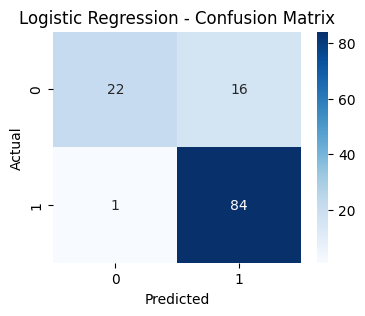

In [47]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate each trained model
for name, model in models.items():
    print(f"\n📊 Evaluating {name}...")
    y_pred = model.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"✅ Accuracy: {acc:.4f}")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


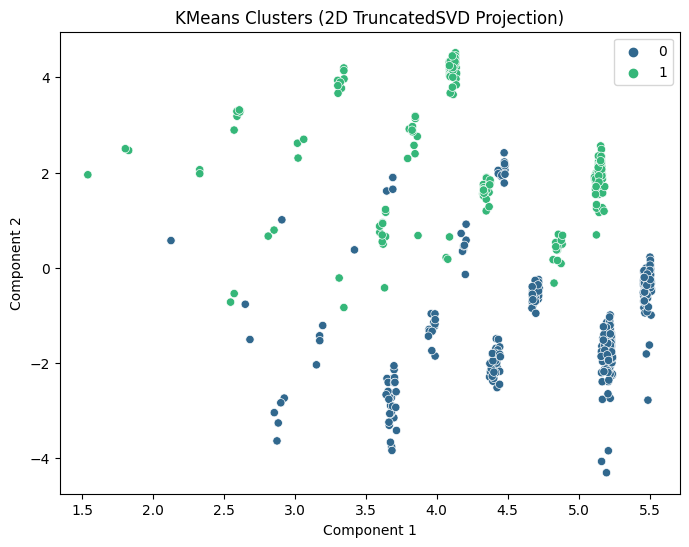


Cluster vs Loan Status:
 Loan_Status    N    Y
Cluster              
0            113  288
1             79  134


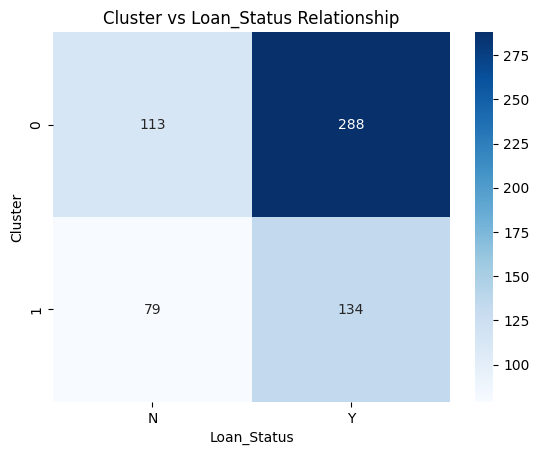

In [54]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ------------------------------
# Step 1: Prepare the data
# ------------------------------
X = train_df.drop('Loan_Status', axis=1)

# Apply preprocessing pipeline (without classifier)
X_processed = preprocessor.fit_transform(X)

# Standardize numerical features
scaler = StandardScaler(with_mean=False)  # for sparse data
X_scaled = scaler.fit_transform(X_processed)

# ------------------------------
# Step 2: Apply KMeans clustering
# ------------------------------
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels back to DataFrame
train_df['Cluster'] = kmeans_labels

# ------------------------------
# Step 3: Visualize clusters with TruncatedSVD (instead of PCA)
# ------------------------------
svd = TruncatedSVD(n_components=2, random_state=42)
X_reduced = svd.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=kmeans_labels, palette='viridis')
plt.title('KMeans Clusters (2D TruncatedSVD Projection)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# ------------------------------
# Step 4: Compare cluster labels vs Loan_Status
# ------------------------------
ct = pd.crosstab(train_df['Cluster'], train_df['Loan_Status'])
print("\nCluster vs Loan Status:\n", ct)

sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title("Cluster vs Loan_Status Relationship")
plt.show()


Inertia: 387113.41
Silhouette Score: 0.004


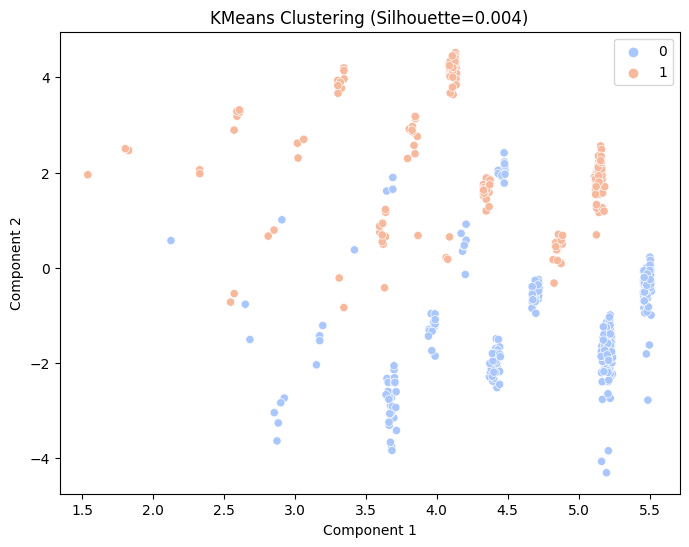

In [53]:
from sklearn.metrics import silhouette_score

# ------------------------------
# Step 1: Compute evaluation metrics
# ------------------------------

# Inertia (measures within-cluster compactness — lower is better)
inertia = kmeans.inertia_

# Silhouette Score (measures separation between clusters — higher is better)
sil_score = silhouette_score(X_scaled, kmeans_labels)

print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {sil_score:.3f}")

# ------------------------------
# Step 2: Visualize cluster centers
# ------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=kmeans_labels, palette='coolwarm')
plt.title(f"KMeans Clustering (Silhouette={sil_score:.3f})")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()
